In [148]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats import multitest
from scipy.stats import norm

### Data import

In [2]:
class fish:
    def __init__(self, coor, dff, mask):
        self.coor = coor
        self.dff = dff
        self.mask = mask

In [3]:
### read brain activity data of fish tested on 20220208 
wdir_0208 = '/Users/jialexu/Library/CloudStorage/Box-Box/UCSF/Research/Project8LD_NeuralNetwork/experiments/caiman/20220317/All_fish/'

df_behavior_0208 = pd.read_excel('/Users/jialexu/Library/CloudStorage/Box-Box/UCSF/Research/Project8LD_NeuralNetwork/experiments/behavior_test/DerivedData/SDA_VDA_selection_20220208.xlsx',
                            sheet_name=3, index_col=0)
coor_list_0208 = []
dff_list_0208 = []
mask_0208 = []
dic_0208 = {}
for Fish in df_behavior_0208.index:
    coor = pd.read_csv(wdir_0208 +Fish+'_coor.csv',index_col=0)
    dff = pd.read_csv(wdir_0208 +Fish+'_dff.csv',index_col=0)
    mask = pd.read_csv(wdir_0208 +Fish+'_final_mask.csv',index_col=0)
    dic_0208.update({Fish:fish(coor, dff, mask)})
#df = pd.DataFrame.from_dict(dic, orient='index')
#df

In [4]:
### read brain activity data of fish tested on 20220427 
wdir_0427 = '/Users/jialexu/Library/CloudStorage/Box-Box/UCSF/Research/Project8LD_NeuralNetwork/experiments/caiman/20220427/All_fish/'

df_behavior_0427 = pd.read_excel('/Users/jialexu/Library/CloudStorage/Box-Box/UCSF/Research/Project8LD_NeuralNetwork/experiments/behavior_test/DerivedData/SDA_VDA_selection_20220427.xlsx',
                            sheet_name=4, index_col=0)
coor_list_0427 = []
dff_list_0427 = []
mask_0427 = []
dic_0427 = {}
for Fish in df_behavior_0427.index:
    coor_0427 = pd.read_csv(wdir_0427+Fish+'_coor.csv',index_col=0)
    dff_0427 = pd.read_csv(wdir_0427+Fish+'_dff.csv',index_col=0)
    mask_0427 = pd.read_csv(wdir_0427+Fish+'_final_mask.csv',index_col=0)
    dic_0427.update({Fish:fish(coor_0427, dff_0427, mask_0427)})



In [18]:
dic_0427['Fish06'].coor.shape[0]

29935

In [19]:
for keys in dic_0427.keys():
    print(dic_0427[keys].coor.shape[0])

29935
40623
34257
51935
25434
41679
30638
33375
31113
38014
41478
40660


### Comparions of mean activity of anatomical masks

In [20]:
### compute the mean activity of each mask of each fish tested on 20220208
list_all_fish_region_mean_0208 = []
for fish in dic_0208.keys():
    
    dic_all_region_mean_0208 = {}
    
    for region in dic_0208[fish].mask.index:
        df = dic_0208[fish].mask.transpose()
        dff = dic_0208[fish].dff
        df_single_region_mean_0208 = dff.loc[dff.index.intersection(df.loc[df[region] == 1].index.astype('int'))].mean(axis=1).mean()
        dic_all_region_mean_0208.update({region:df_single_region_mean_0208})

    df_all_region_mean_0208 = pd.Series(dic_all_region_mean_0208)
    list_all_fish_region_mean_0208.append(df_all_region_mean_0208)

df_all_fish_region_mean_0208 = pd.concat(list_all_fish_region_mean_0208,axis=1)
df_all_fish_region_mean_0208.columns = list(dic_0208.keys())
df_all_fish_region_mean_0208.columns = list(df_behavior_0208.index + df_behavior_0208['Category'])
df_all_fish_region_mean_0208.columns = '0208_'+df_all_fish_region_mean_0208.columns 
df_all_fish_region_mean_0208 = df_all_fish_region_mean_0208.loc[:,~df_all_fish_region_mean_0208.columns.str.contains('Fish07')]
df_all_fish_region_mean_0208 = df_all_fish_region_mean_0208.dropna()
df_all_fish_region_mean_0208



,0208_Fish04SDA,0208_Fish05SDA,0208_Fish08SDA,0208_Fish06VDA,0208_Fish03VDA
Diencephalon -,241.172534,259.211662,143.096838,387.427444,137.142058
Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,326.179732,357.107832,47.043320,663.250931,117.260585
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,416.043025,578.224571,274.884254,519.997309,368.998156
Diencephalon - Caudal Hypothalamus,124.651889,119.478877,76.766880,359.440534,109.764859
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,129.813558,194.843325,57.675495,187.812675,53.332926
...,...,...,...,...,...
Telencephalon - Subpallial dopaminergic cluster,692.069543,480.175989,366.726001,534.937840,741.265152
Telencephalon - Subpallium,541.926040,552.167307,308.298622,372.881085,269.133707
Telencephalon - Telencephalic Migrated Area 4 (M4),392.615909,356.881924,165.376686,145.780418,38.359232
Telencephalon - Vglut2 rind,301.480825,239.142394,174.047974,219.096446,134.573018


In [ ]:
### compute the mean activity of each mask of each fish tested on 20220427
list_all_fish_region_mean_0427 = []
for fish in dic_0427.keys():
    
    dic_all_region_mean_0427 = {}
    
    for region in dic_0427[fish].mask.index:
        df = dic_0427[fish].mask.transpose()
        dff = dic_0427[fish].dff
        df_single_region_mean_0427 = dff.loc[dff.index.intersection(df.loc[df[region] == 1].index.astype('int'))].mean(axis=1).mean()
        dic_all_region_mean_0427.update({region:df_single_region_mean_0427})

    df_all_region_mean_0427 = pd.Series(dic_all_region_mean_0427)
    list_all_fish_region_mean_0427.append(df_all_region_mean_0427)

df_all_fish_region_mean_0427 = pd.concat(list_all_fish_region_mean_0427,axis=1)
df_all_fish_region_mean_0427.columns = list(dic_0427.keys())
df_all_fish_region_mean_0427 = df_all_fish_region_mean_0427.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]


columns_0427 = df_behavior_0427.loc[~df_behavior_0427.index.str.contains('Fish11')].index+df_behavior_0427.loc[~df_behavior_0427.index.str.contains('Fish11')]['Cat']
columns_0427 = '0427_'+columns_0427

df_all_fish_region_mean_0427 = df_all_fish_region_mean_0427.copy()
df_all_fish_region_mean_0427 = df_all_fish_region_mean_0427.dropna()
df_all_fish_region_mean_0427.columns = columns_0427

### combine the two experiments data into one dataset
df_all_fish_region_mean = pd.concat((df_all_fish_region_mean_0427, df_all_fish_region_mean_0208),axis=1).dropna()
df_all_fish_region_mean

In [ ]:
### save the raw data of region mean activity
df_all_fish_region_mean.to_csv('All_fish_region_mean_activity.csv')

In [24]:
df = pd.read_csv('All_fish_region_mean_std.csv', index_col = 0)

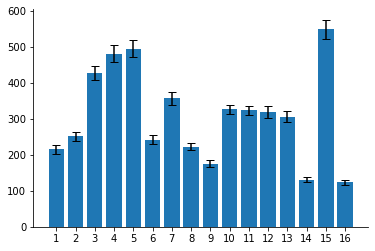

In [67]:
f = plt.figure()
plt.bar(x = range(1,17), height = df.mean(axis=0), yerr = df.sem(axis=0), capsize = 4)
plt.xticks(range(1,17))
f.axes[0].spines['right'].set_visible(False)
f.axes[0].spines['top'].set_visible(False)
plt.show()

In [ ]:
### normalize the data across all the fish using median of ratios method

df = df_all_fish_region_mean.dropna().round(0)
df['geometric_mean'] = stats.gmean(df,axis=1)
dic_normalized = {}
for i, fish in enumerate(df.iloc[:,:-1].columns):
    median = (df.iloc[:,:-1].apply(lambda x: x/df['geometric_mean'])).median()[i]
    normalized = df[fish]/median
    dic_normalized.update({fish:normalized})
df_normalized = pd.DataFrame(dic_normalized)
df_normalized

In [68]:
### normalize the data across all the fish using median of ratios method

df = df.dropna().round(0)
df['geometric_mean'] = stats.gmean(df,axis=1)
dic_normalized = {}
for i, fish in enumerate(df.iloc[:,:-1].columns):
    median = (df.iloc[:,:-1].apply(lambda x: x/df['geometric_mean'])).median()[i]
    normalized = df[fish]/median
    dic_normalized.update({fish:normalized})
df_normalized = pd.DataFrame(dic_normalized)
df_normalized

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


,0427_Fish06SDA,0427_Fish03SDA,0427_Fish09SDA,0427_Fish13SDA,0427_Fish01SDA,0427_Fish12VDA,0427_Fish02VDA,0427_Fish04VDA,0427_Fish05VDA,0427_Fish10VDA,0427_Fish08VDA,0208_Fish04SDA,0208_Fish05SDA,0208_Fish08SDA,0208_Fish06VDA,0208_Fish03VDA
Diencephalon -,229.665941,130.756197,197.030992,188.909316,253.882014,206.233714,179.233774,185.982987,232.183613,217.229466,228.348156,165.333801,215.274537,165.444223,210.899577,187.749153
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,337.596382,314.029227,377.437494,81.843545,621.471802,449.964466,268.122069,408.517544,442.868743,355.057818,384.004165,328.124004,487.784764,403.683903,342.887954,663.990906
Diencephalon - Caudal Hypothalamus,121.735499,112.536071,154.546184,95.741506,130.861965,111.388262,126.046516,149.431417,88.860395,191.012117,153.285613,77.155774,97.386100,79.413227,208.551029,164.852915
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,99.145406,53.588605,167.476343,76.696153,123.020049,61.759829,102.731553,162.331971,108.925646,107.865666,92.445447,50.871939,143.516358,44.118459,111.790867,50.371724
Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,350.146434,60.019238,168.092065,270.238122,442.578105,371.661826,370.853622,288.112373,280.913507,213.484131,263.113965,272.164872,233.214082,253.681141,326.448120,315.968086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Telencephalon - Subpallial dopaminergic cluster,960.078932,369.761377,572.621320,722.179209,202.909563,699.209489,715.477911,623.526778,613.423373,208.240661,611.562189,655.400143,504.015781,913.252108,380.934425,1165.418521
Telencephalon - Subpallium,795.673258,347.254163,572.005598,478.707530,371.020627,455.478737,538.429915,475.170406,500.198031,170.787305,461.437104,503.632193,508.287101,624.276200,217.475510,446.476644
Telencephalon - Telencephalic Migrated Area 4 (M4),317.516300,130.756197,210.576872,328.403660,106.355979,51.834142,158.104589,151.581510,204.952202,323.596998,247.311325,286.578588,259.696267,231.621912,56.834853,25.185862
Telencephalon - Vglut2 rind,476.901953,202.564928,238.900078,97.800463,191.636810,487.461505,340.981326,201.033633,319.610776,187.266781,323.163999,271.317006,191.355144,247.063372,124.942734,169.432162


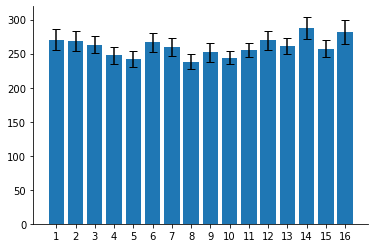

In [69]:
f = plt.figure()
plt.bar(x = range(1,17), height = df_normalized.mean(axis=0), yerr = df_normalized.sem(axis=0), capsize = 4)
plt.xticks(range(1,17))
f.axes[0].spines['right'].set_visible(False)
f.axes[0].spines['top'].set_visible(False)
plt.show()

In [ ]:
### save the normalized data of region mean activity
df_normalized.to_csv('All_fish_normaliozed_region_mean_activity.csv')

In [ ]:
### perform t-test for each mask
test_list=[]
df_SDA = df_normalized.loc[:,df_normalized.columns.str.contains('SDA')]
df_VDA = df_normalized.loc[:,df_normalized.columns.str.contains('VDA')]

for i in range(197):
    
    test_result = pg.ttest(df_SDA.iloc[i,:], df_VDA.iloc[i,:])
    test_result['region'] = df_normalized.index[i]
    test_list.append(test_result)
df_test = pd.concat(test_list)
df_test.sort_values(by='p-val').head(10)

In [ ]:
### permutation analysis to determine p-value threshold for each mask
adjusted_pval_list = []
for j in range(197):  
    perm_test_list = []
    region = df_test.sort_values(by='p-val')['region'][j]
    observed_dff = df_normalized.loc[:,df_normalized.columns.str.contains('SDA')].loc[region].mean() - df_normalized.loc[:,df_normalized.columns.str.contains('VDA')].loc[region].mean()
    for i in range(500):
        df_normalized_shuffled = df_normalized.copy()
        df_normalized_shuffled.columns = np.random.permutation(df_normalized.columns)
        df_SDA = df_normalized_shuffled.loc[:,df_normalized_shuffled.columns.str.contains('SDA')]
        df_VDA = df_normalized_shuffled.loc[:,df_normalized_shuffled.columns.str.contains('VDA')]
        perm_dff = df_SDA.loc[region].mean()- df_VDA.loc[region].mean()
        perm_test_list.append(perm_dff)
    df_perm = pd.Series(perm_test_list)
    adjusted_pval = 1-stats.percentileofscore(df_perm.abs(), abs(observed_dff), 'strict')*0.01
    adjusted_pval_list.append(adjusted_pval)

df_test_perm = df_test.sort_values(by='p-val')
df_test_perm['adjusted_pval'] = adjusted_pval_list
df_test_perm

In [ ]:
### compute the mean and se of VDA and SDA in masks detected with significant differences
### save the test results
df_test_mean = df_test_perm.loc[df_test_perm['adjusted_pval']<0.05].set_index('region')
dic_region_summary = {}
for region in df_test_mean.index:
    sda_mean = df_normalized.loc[:, df_normalized.columns.str.contains('SDA')].loc[region].mean()
    sda_sem = df_normalized.loc[:, df_normalized.columns.str.contains('SDA')].loc[region].sem()
    vda_mean = df_normalized.loc[:, df_normalized.columns.str.contains('VDA')].loc[region].mean()
    vda_sem = df_normalized.loc[:, df_normalized.columns.str.contains('VDA')].loc[region].sem()
    dic_region_summary.update({region:[sda_mean, sda_sem, vda_mean, vda_sem]})
df_summary = pd.DataFrame(dic_region_summary).transpose()
df_summary.columns = ['sda_mean', 'sda_sem', 'vda_mean', 'vda_sem']
df_summary = pd.concat((df_summary, df_test_mean[['p-val', 'adjusted_pval']]), axis=1)
df_summary.to_excel('Neural_activity_mean_comparison.xlsx')
df_summary

In [ ]:
### plot bar chart of the masks with significant differences
df = pd.read_excel('Neural_activity_mean_comparison.xlsx', index_col=0)
f,ax = plt.subplots(3,5, figsize = (35,10))
plt.subplots_adjust(wspace=0.7, hspace=0.5)
for i, mask in enumerate (df.index):
    title = '**' if df.iloc[i,-1]<0.01 else '*'
    ax[i//5][i%5].bar(x=[1,2], height = df.iloc[i,[0,2]], yerr = df.iloc[i,[1,3]], capsize=4, color=['r', 'b'])
    ax[i//5][i%5].set_ylabel('Activity mean', size=20)
    ax[i//5][i%5].set_xticks([1,2])
    ax[i//5][i%5].set_xticklabels(['SDA', 'VDA'])
    ax[i//5][i%5].set_xlabel(mask,size=15)
    ax[i//5][i%5].set_title(title, size=20)
    ax[i//5][i%5].spines['right'].set_visible(False)
    ax[i//5][i%5].spines['top'].set_visible(False)
ax[2][3].spines['right'].set_visible(False)
ax[2][3].spines['top'].set_visible(False)
ax[2][3].spines['left'].set_visible(False)
ax[2][3].spines['bottom'].set_visible(False)
ax[2][4].spines['right'].set_visible(False)
ax[2][4].spines['top'].set_visible(False) 

### Comparions of mean std of anatomical masks

In [ ]:
### compute the mean activity of each mask of each fish tested on 20220208
list_all_fish_region_std_0208 = []
for fish in dic_0208.keys():
    
    dic_all_region_std_0208 = {}
    
    for region in dic_0208[fish].mask.index:
        df = dic_0208[fish].mask.transpose()
        dff = dic_0208[fish].dff
        df_single_region_std_0208 = dff.loc[dff.index.intersection(df.loc[df[region] == 1].index.astype('int'))].std(axis=1).mean()
        dic_all_region_std_0208.update({region:df_single_region_std_0208})

    df_all_region_std_0208 = pd.Series(dic_all_region_std_0208)
    list_all_fish_region_std_0208.append(df_all_region_std_0208)

df_all_fish_region_std_0208 = pd.concat(list_all_fish_region_std_0208,axis=1)
df_all_fish_region_std_0208.columns = list(dic_0208.keys())
df_all_fish_region_std_0208.columns = list(df_behavior_0208.index + df_behavior_0208['Category'])
df_all_fish_region_std_0208.columns = '0208_'+df_all_fish_region_std_0208.columns 
df_all_fish_region_std_0208 = df_all_fish_region_std_0208.loc[:,~df_all_fish_region_std_0208.columns.str.contains('Fish07')]
df_all_fish_region_std_0208 = df_all_fish_region_std_0208.dropna()
df_all_fish_region_std_0208


In [ ]:
### compute the std activity of each mask of each fish tested on 20220427
list_all_fish_region_std_0427 = []
for fish in dic_0427.keys():
    
    dic_all_region_std_0427 = {}
    
    for region in dic_0427[fish].mask.index:
        df = dic_0427[fish].mask.transpose()
        dff = dic_0427[fish].dff
        df_single_region_std_0427 = dff.loc[dff.index.intersection(df.loc[df[region] == 1].index.astype('int'))].std(axis=1).mean()
        dic_all_region_std_0427.update({region:df_single_region_std_0427})

    df_all_region_std_0427 = pd.Series(dic_all_region_std_0427)
    list_all_fish_region_std_0427.append(df_all_region_std_0427)

df_all_fish_region_std_0427 = pd.concat(list_all_fish_region_std_0427,axis=1)
df_all_fish_region_std_0427.columns = list(dic_0427.keys())
df_all_fish_region_std_0427 = df_all_fish_region_std_0427.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]


columns_0427 = df_behavior_0427.loc[~df_behavior_0427.index.str.contains('Fish11')].index+df_behavior_0427.loc[~df_behavior_0427.index.str.contains('Fish11')]['Cat']
columns_0427 = '0427_'+columns_0427

df_all_fish_region_std_0427 = df_all_fish_region_std_0427.copy()
df_all_fish_region_std_0427 = df_all_fish_region_std_0427.dropna()
df_all_fish_region_std_0427.columns = columns_0427
df_all_fish_region_std_0427

In [ ]:
### combine the two experiments data into one dataset
df_all_fish_region_std = pd.concat((df_all_fish_region_std_0427, df_all_fish_region_std_0208),axis=1).dropna()
df_all_fish_region_std

In [ ]:
### save the raw data of region mean std
df_all_fish_region_std.to_csv('All_fish_region_mean_std.csv')

In [ ]:
### normalize the data across all the fish using median of ratios method

df = df_all_fish_region_std.dropna().round(0)
df = df.loc[~(df == 0).any(axis=1)] # drop rows contain 0 
df['geometric_std'] = stats.gmean(df,axis=1)
dic_normalized_std = {}
for i, fish in enumerate(df.iloc[:,:-1].columns):
    median = (df.iloc[:,:-1].apply(lambda x: x/df['geometric_std'])).median()[i]
    normalized = df[fish]/median
    dic_normalized_std.update({fish:normalized})
df_normalized_std = pd.DataFrame(dic_normalized_std)
df_normalized_std

In [ ]:
### save the normalized data of region mean std

df_normalized_std.to_csv('All_fish_normaliozed_region_mean_std.csv')

#### Statistical test

In [126]:
df_normalized_std = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Brain_activity/All_fish_normaliozed_region_mean_std.csv', index_col=0)
df_normalized_std = df_normalized_std.transpose() 

In [3]:
### perform t-test for each mask

test_list=[]
df_SDA = df_normalized_std.loc[:,df_normalized_std.columns.str.contains('SDA')]
df_VDA = df_normalized_std.loc[:,df_normalized_std.columns.str.contains('VDA')]

for i in range(194):
    
    test_result = pg.ttest(df_SDA.iloc[i,:], df_VDA.iloc[i,:])
    test_result['region'] = df_normalized_std.index[i]
    test_list.append(test_result)
df_test = pd.concat(test_list)
df_test.sort_values(by='p-val').head(10)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,region
T-test,3.772262,14,two-sided,0.002061,"[91.64, 333.17]",1.886131,16.745,0.938596,Rhombencephalon - Medial Vestibular Nucleus
T-test,2.864169,14,two-sided,0.012496,"[17.32, 120.57]",1.432085,4.453,0.759168,Ganglia - Olfactory Epithelium
T-test,-2.587880,14,two-sided,0.021478,"[-105.0, -9.83]",1.293940,3.062,0.672834,Diencephalon - Migrated Posterior Tubercular A...
T-test,2.570113,14,two-sided,0.022232,"[38.08, 422.11]",1.285056,2.991,0.666872,Telencephalon - Isl1 cluster 1
T-test,2.559621,14,two-sided,0.022690,"[14.62, 165.79]",1.279811,2.95,0.663331,Rhombencephalon - Neuropil Region 4
T-test,-2.468512,14,two-sided,0.027062,"[-317.26, -22.26]",1.234256,2.62,0.631995,Diencephalon - Retinal Arborization Field 3 (AF3)
T-test,-2.425834,14,two-sided,0.029377,"[-119.07, -7.32]",1.212917,2.48,0.616990,Diencephalon - Hypothalamus Vglut2 Cluster 2
T-test,-2.374336,14,two-sided,0.032422,"[-77.82, -3.95]",1.187168,2.323,0.598647,Diencephalon - Caudal Hypothalamus
T-test,-2.335893,14,two-sided,0.034888,"[-361.59, -15.42]",1.167946,2.214,0.584807,Diencephalon - Isl1 cluster 1
T-test,2.297702,14,two-sided,0.037513,"[3.89, 113.01]",1.148851,2.111,0.570952,Rhombencephalon - Rhombomere 3


In [95]:
df_bigmask = df_normalized_std.loc[df_normalized_std.index.str.split('-').str[-1].str.len()==0].transpose()


In [127]:
def ancova(df):
    bigmasks = df.loc[:,df.columns.str.split('-').str[-1].str.len()==0].columns
    ancova_list = []
    mask_list = []
    for mask in df.columns[:-1]:
        if mask not in bigmasks and (mask.split('-')[0]+'-') in bigmasks:
            covariable = mask.split('-')[0]+'-'
            ancova = pg.ancova(data = df, dv = mask, covar=covariable, between='Cat')
            ancova_list.append(ancova.iloc[0,4])
            mask_list.append(mask)
        else: 
            next
    df_res = pd.Series(ancova_list)
    df_res.index = mask_list
    return df_res

In [31]:
arraylist = []
while len(arraylist)<10000:#the maximum round of permutation test based on current dataset is 210
    
    array = pd.Series(['SDA']*8+['VDA']*8).sample(frac=1).to_list()
    arraylist.append(array)

In [82]:
df_temp = pd.DataFrame(arraylist, columns=c.columns).drop_duplicates().transpose()

perm_list = []
df_normalized_std_shuffled = df_normalized_std.copy().transpose()
for column in df_temp.columns:
    df_normalized_std_shuffled['Cat'] = df_temp[column]
    perm_res = ancova(df_normalized_std_shuffled)
    perm_list.append(perm_res)
    if i%1000 == 0:
        print (i)

KeyboardInterrupt: 

In [85]:
df_perm_res = pd.concat(perm_list,axis=1)

In [136]:
df_exp_ancova = ancova(df_normalized_std)

In [146]:
df_adj_p_ancova = pd.concat((df_exp_ancova,df_perm_res.mean(axis=1), df_perm_res.std(axis=1)),axis=1)
df_adj_p_ancova.columns = ['p-unc', 'perm_mean', 'perm_std']
df_adj_p_ancova

,p-unc,perm_mean,perm_std
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,0.705294,0.490260,0.294182
Diencephalon - Caudal Hypothalamus,0.052413,0.502228,0.288135
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,0.895006,0.507827,0.286288
Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,0.500064,0.500963,0.294269
Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,0.704386,0.505747,0.287094
...,...,...,...
Telencephalon - Subpallial dopaminergic cluster,0.448925,0.470555,0.269790
Telencephalon - Subpallium,0.146432,0.507320,0.290974
Telencephalon - Telencephalic Migrated Area 4 (M4),0.172589,0.490287,0.292279
Telencephalon - Vglut2 rind,0.041274,0.488899,0.282185


In [149]:
df_adj_p_ancova['p_adj'] = ((df_adj_p_ancova['p-unc'] - df_adj_p_ancova['perm_mean'])/df_adj_p_ancova['perm_std']).apply(lambda x: 1-norm.sf((x)))
df_adj_p_ancova


,p-unc,perm_mean,perm_std,p_adj
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,0.705294,0.490260,0.294182,0.767597
Diencephalon - Caudal Hypothalamus,0.052413,0.502228,0.288135,0.059247
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,0.895006,0.507827,0.286288,0.911878
Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,0.500064,0.500963,0.294269,0.498782
Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,0.704386,0.505747,0.287094,0.755499
...,...,...,...,...
Telencephalon - Subpallial dopaminergic cluster,0.448925,0.470555,0.269790,0.468049
Telencephalon - Subpallium,0.146432,0.507320,0.290974,0.107437
Telencephalon - Telencephalic Migrated Area 4 (M4),0.172589,0.490287,0.292279,0.138525
Telencephalon - Vglut2 rind,0.041274,0.488899,0.282185,0.056338


In [150]:
df_adj_p_ancova.loc[df_adj_p_ancova['p_adj']<0.05]

,p-unc,perm_mean,perm_std,p_adj
Diencephalon - Migrated Posterior Tubercular Area (M2),0.035439,0.502796,0.280934,0.048098
Mesencephalon - Retinal Arborization Field 7 (AF7),0.038232,0.508501,0.281941,0.047661
Mesencephalon - Tecum Neuropil,0.008129,0.495692,0.293464,0.048316
Rhombencephalon - Medial Vestibular Nucleus,0.003539,0.500033,0.290478,0.043704
Rhombencephalon - Neuropil Region 4,0.004317,0.501616,0.287686,0.041939
Telencephalon - Isl1 cluster 1,0.010735,0.506388,0.290132,0.043784


In [8]:
### permutation analysis to determine p-value threshold for each mask
adjusted_pval_list = []
for j in range(194):  
    perm_test_list = []
    region = df_test.sort_values(by='p-val')['region'][j]
    observed_dff = df_normalized_std.loc[:,df_normalized_std.columns.str.contains('SDA')].loc[region].mean() - df_normalized_std.loc[:,df_normalized_std.columns.str.contains('VDA')].loc[region].mean()
    for i in range(500):
        df_normalized_std_shuffled = df_normalized_std.copy()
        df_normalized_std_shuffled.columns = np.random.permutation(df_normalized_std.columns)
        df_SDA = df_normalized_std_shuffled.loc[:,df_normalized_std_shuffled.columns.str.contains('SDA')]
        df_VDA = df_normalized_std_shuffled.loc[:,df_normalized_std_shuffled.columns.str.contains('VDA')]
        perm_dff = df_SDA.loc[region].mean()- df_VDA.loc[region].mean()
        perm_test_list.append(perm_dff)
    df_perm = pd.Series(perm_test_list)
    adjusted_pval = 1-stats.percentileofscore(df_perm.abs(), abs(observed_dff), 'strict')*0.01
    adjusted_pval_list.append(adjusted_pval)

df_test_perm = df_test.sort_values(by='p-val')
df_test_perm['adjusted_pval'] = adjusted_pval_list
df_test_perm

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,region,adjusted_pval
T-test,3.772262,14,two-sided,0.002061,"[91.64, 333.17]",1.886131,16.745,0.938596,Rhombencephalon - Medial Vestibular Nucleus,0.000
T-test,2.864169,14,two-sided,0.012496,"[17.32, 120.57]",1.432085,4.453,0.759168,Ganglia - Olfactory Epithelium,0.018
T-test,-2.587880,14,two-sided,0.021478,"[-105.0, -9.83]",1.293940,3.062,0.672834,Diencephalon - Migrated Posterior Tubercular A...,0.030
T-test,2.570113,14,two-sided,0.022232,"[38.08, 422.11]",1.285056,2.991,0.666872,Telencephalon - Isl1 cluster 1,0.010
T-test,2.559621,14,two-sided,0.022690,"[14.62, 165.79]",1.279811,2.95,0.663331,Rhombencephalon - Neuropil Region 4,0.016
...,...,...,...,...,...,...,...,...,...,...
T-test,0.049282,14,two-sided,0.961391,"[-130.78, 136.93]",0.024641,0.428,0.050242,Telencephalon - Optic Commissure,0.970
T-test,0.043528,14,two-sided,0.965895,"[-80.16, 83.48]",0.021764,0.428,0.050189,Ganglia - Posterior Lateral Line Ganglia,0.974
T-test,-0.042573,14,two-sided,0.966643,"[-171.53, 164.85]",0.021286,0.428,0.050181,Rhombencephalon - Locus Coreuleus,0.974
T-test,0.029709,14,two-sided,0.976719,"[-45.32, 46.6]",0.014854,0.428,0.050088,Rhombencephalon - Rhombomere 1,0.972


In [12]:
### compute the mean and se of VDA and SDA in masks detected with significant differences
### save the resulted data into files
df_test_std = df_test_perm.loc[df_test_perm['adjusted_pval']<0.05].set_index('region')
dic_region_summary = {}
for region in df_test_std.index:
    sda_mean = df_normalized_std.loc[:, df_normalized_std.columns.str.contains('SDA')].loc[region].mean()
    sda_sem = df_normalized_std.loc[:, df_normalized_std.columns.str.contains('SDA')].loc[region].sem()
    vda_mean = df_normalized_std.loc[:, df_normalized_std.columns.str.contains('VDA')].loc[region].mean()
    vda_sem = df_normalized_std.loc[:, df_normalized_std.columns.str.contains('VDA')].loc[region].sem()
    dic_region_summary.update({region:[sda_mean, sda_sem, vda_mean, vda_sem]})
df_summary = pd.DataFrame(dic_region_summary).transpose()
df_summary.columns = ['sda_mean', 'sda_sem', 'vda_mean', 'vda_sem']
df_summary = pd.concat((df_summary, df_test_std[['p-val', 'adjusted_pval']]), axis=1)
df_summary.to_excel('Neural_activity_std_comparison.xlsx')
df_summary

,sda_mean,sda_sem,vda_mean,vda_sem,p-val,adjusted_pval
Rhombencephalon - Medial Vestibular Nucleus,331.720486,48.253898,119.314623,29.018484,0.002061,0.000
Ganglia - Olfactory Epithelium,127.458228,12.936951,58.514390,20.299149,0.012496,0.018
Diencephalon - Migrated Posterior Tubercular Area (M2),83.733573,14.071359,141.148877,17.153008,0.021478,0.030
Telencephalon - Isl1 cluster 1,612.252023,62.702792,382.157311,63.901941,0.022232,0.010
Rhombencephalon - Neuropil Region 4,402.189781,22.676411,311.983449,26.977462,0.022690,0.016
Diencephalon - Retinal Arborization Field 3 (AF3),132.899841,27.436690,302.659713,63.059950,0.027062,0.030
Diencephalon - Hypothalamus Vglut2 Cluster 2,44.992141,9.365653,108.185369,24.308274,0.029377,0.032
Diencephalon - Caudal Hypothalamus,109.794536,9.511580,150.680156,14.354503,0.032422,0.032
Diencephalon - Isl1 cluster 1,174.258537,45.895092,362.765742,66.379045,0.034888,0.032
Rhombencephalon - Rhombomere 3,346.897418,16.106335,288.448118,19.689741,0.037513,0.048


In [2]:
df_summary = pd.read_excel("Neural_activity_std_comparison.xlsx", index_col=0)
df_summary = df_summary.sort_values(by="Unnamed: 7")
df_summary

,sda_mean,sda_sem,vda_mean,vda_sem,p-val,adjusted_pval,Unnamed: 7
Rhombencephalon - Medial Vestibular Nucleus,331.720486,48.253898,119.314623,29.018484,0.002061,0.008,SDA hyper
Ganglia - Olfactory Epithelium,127.458228,12.936951,58.514390,20.299149,0.012496,0.012,SDA hyper
Telencephalon - Isl1 cluster 1,612.252023,62.702792,382.157311,63.901941,0.022232,0.016,SDA hyper
Rhombencephalon - Neuropil Region 4,402.189781,22.676411,311.983449,26.977462,0.022690,0.008,SDA hyper
Rhombencephalon - Rhombomere 3,346.897418,16.106335,288.448118,19.689741,0.037513,0.040,SDA hyper
Rhombencephalon - Tangential Vestibular Nucleus,212.858095,41.129036,100.099254,26.780755,0.037530,0.032,SDA hyper
Telencephalon - Olig2 Cluster,451.853845,57.291556,275.103955,62.219755,0.055372,0.038,SDA hyper
Rhombencephalon - RoV3,266.680138,65.808428,124.546099,29.405299,0.068710,0.040,SDA hyper
Diencephalon - Migrated Posterior Tubercular Area (M2),83.733573,14.071359,141.148877,17.153008,0.021478,0.020,VDA hyper
Diencephalon - Retinal Arborization Field 3 (AF3),132.899841,27.436690,302.659713,63.059950,0.027062,0.024,VDA hyper


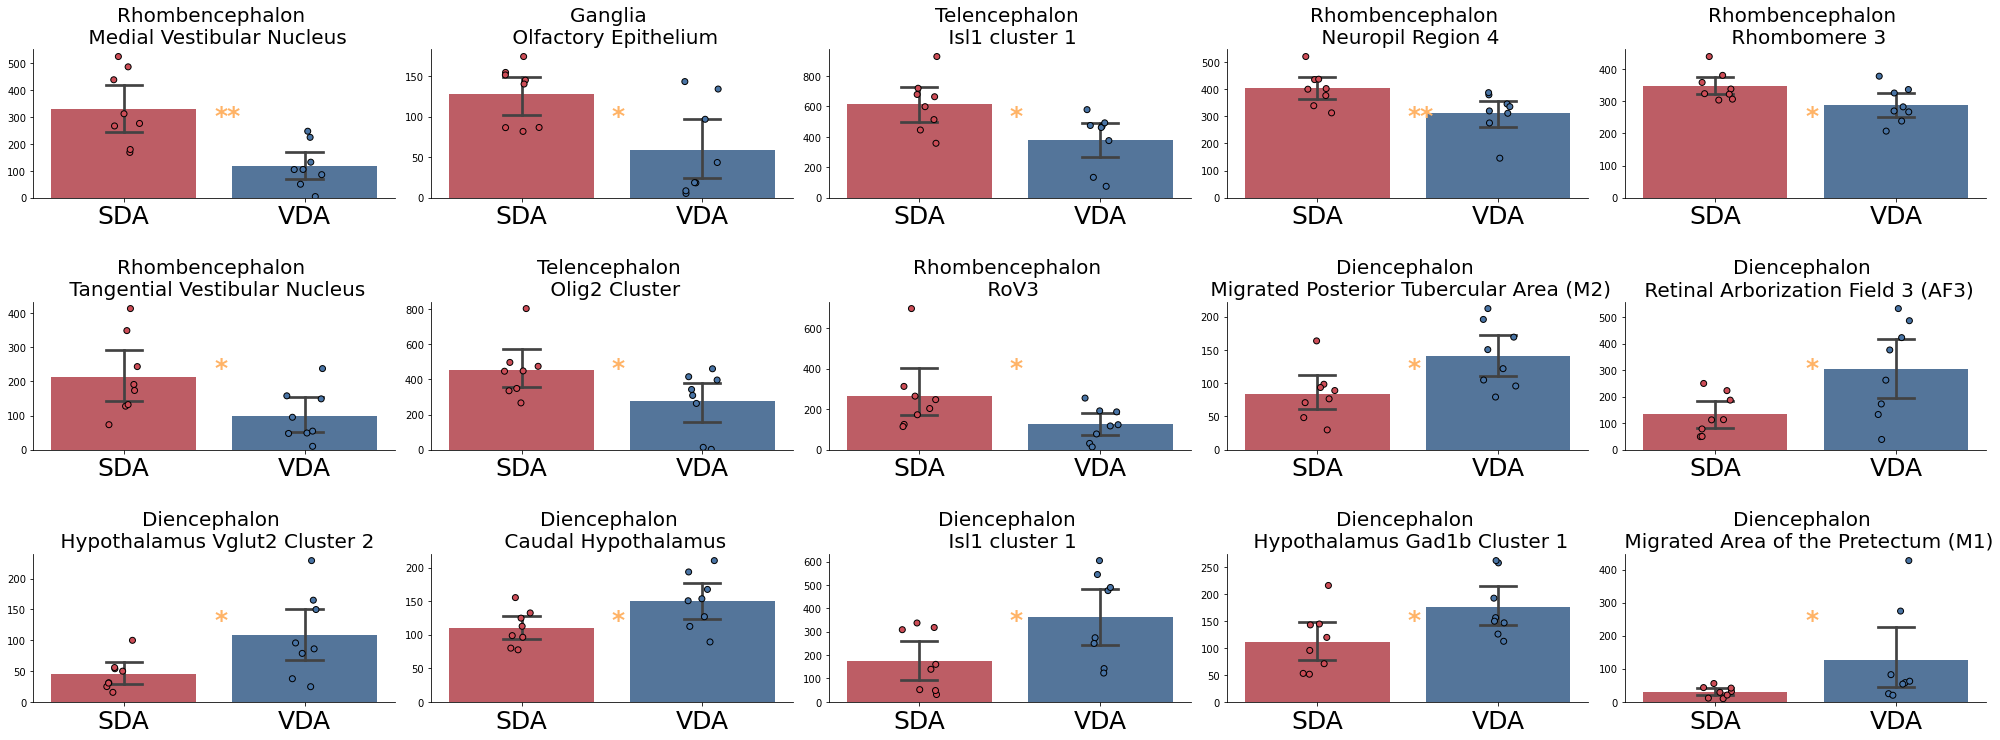

In [113]:
f,ax = plt.subplots(3,5, figsize = (35,12))
plt.subplots_adjust(wspace=0.1, hspace=0.7)
color = {'SDA':'#cd4d57', 'VDA':'#4974a5'}
fontsize = 15
for i, mask in enumerate (df_summary.index):
    res = '**' if df_summary.iloc[i,-2]<0.01 else '*'
    df_plot = df_normalized_std.loc[mask].reset_index()
    df_plot['cat'] = df_plot['index'].str[-3:]
    sns.barplot(x = "cat",y = mask, data = df_plot, palette=color,ax=ax[i//5][i%5], capsize=0.2)
    sns.stripplot(x="cat", y= mask, data=df_plot, jitter=True,dodge=True, marker='o', palette=color, 
              edgecolor='black',ax=ax[i//5][i%5], size=6,linewidth=1)
    ax[i//5][i%5].set_xticklabels(labels= ['SDA', 'VDA'], fontsize=fontsize+10)
    ax[i//5][i%5].spines['top'].set_visible(False)
    ax[i//5][i%5].spines['right'].set_visible(False)
    ax[i//5][i%5].set_title(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+5)
    ax[i//5][i%5].text(0.5, 0.5, res, transform=ax[i//5][i%5].transAxes, 
                       size=fontsize+10, color = "#FFB366",weight='bold')
    ax[i//5][i%5].set_ylabel("")
    ax[i//5][i%5].set_xlabel("")

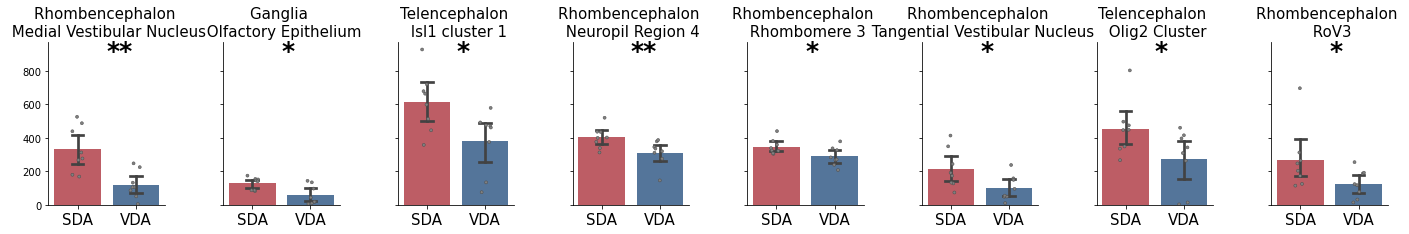

In [8]:
f,ax = plt.subplots(1,8, figsize = (24,3), sharey=True)
plt.subplots_adjust(wspace=0.5, hspace=0)
color = {'SDA':'#cd4d57', 'VDA':'#4974a5'}
fontsize = 5
for i, mask in enumerate (df_summary.loc[df_summary['Unnamed: 7']=='SDA hyper'].index):
    res = '**' if df_summary.iloc[i,-2]<0.01 else '*'
    df_plot = df_normalized_std.loc[mask].reset_index()
    df_plot['cat'] = df_plot['index'].str[-3:]
    sns.barplot(x = "cat",y = mask, data = df_plot, palette=color,ax=ax[i], capsize=0.2)
    sns.stripplot(x="cat", y= mask, data=df_plot, jitter=True,dodge=True, marker='o', color='gray', 
              edgecolor='gray',ax=ax[i], size=3,linewidth=0.5)
    ax[i].set_xticklabels(labels= ['SDA', 'VDA'], fontsize=fontsize+10)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    #ax[i].set_title(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+5)
    ax[i].text(0.5, 0.9, res, transform=ax[i].transAxes, 
                       size=fontsize+20, color = "black",weight='bold')
    #ax[i].set_ylabel(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+10)
    ax[i].set_ylabel("")
    ax[i].set_title(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+10)
    ax[i].set_xlabel("")

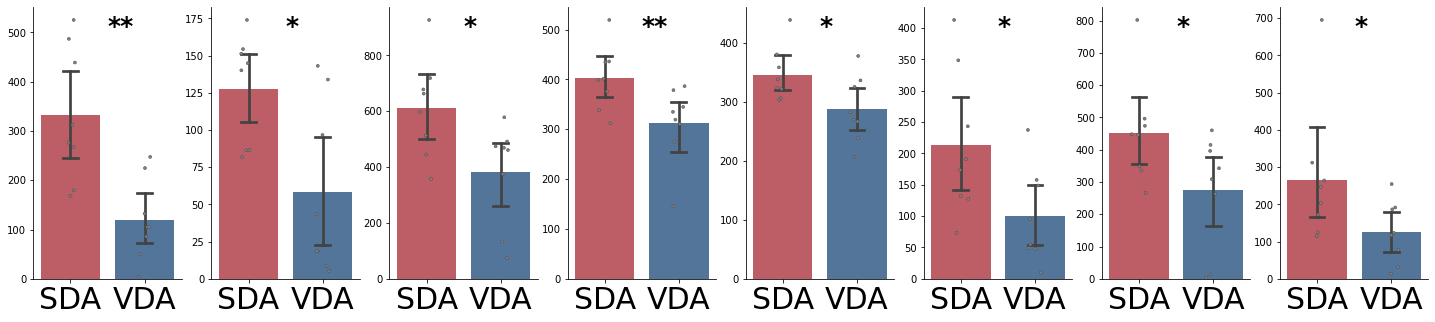

In [26]:
f,ax = plt.subplots(1,8, figsize = (25,5), sharey=False)
plt.subplots_adjust(wspace=0.2, hspace=0)
color = {'SDA':'#cd4d57', 'VDA':'#4974a5'}
fontsize = 5
for i, mask in enumerate (df_summary.loc[df_summary['Unnamed: 7']=='SDA hyper'].index):
    res = '**' if df_summary.iloc[i,-2]<0.01 else '*'
    df_plot = df_normalized_std.loc[mask].reset_index()
    df_plot['cat'] = df_plot['index'].str[-3:]
    sns.barplot(x = "cat",y = mask, data = df_plot, palette=color,ax=ax[i], capsize=0.2)
    sns.stripplot(x="cat", y= mask, data=df_plot, jitter=True,dodge=True, marker='o', color='gray', 
              edgecolor='gray',ax=ax[i], size=3,linewidth=0.5)
    ax[i].set_xticklabels(labels= ['SDA', 'VDA'], fontsize=fontsize+25)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    #ax[i].set_title(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+5)
    ax[i].text(0.5, 0.9, res, transform=ax[i].transAxes, 
                       size=fontsize+20, color = "black",weight='bold')
    #ax[i].set_ylabel(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+10)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

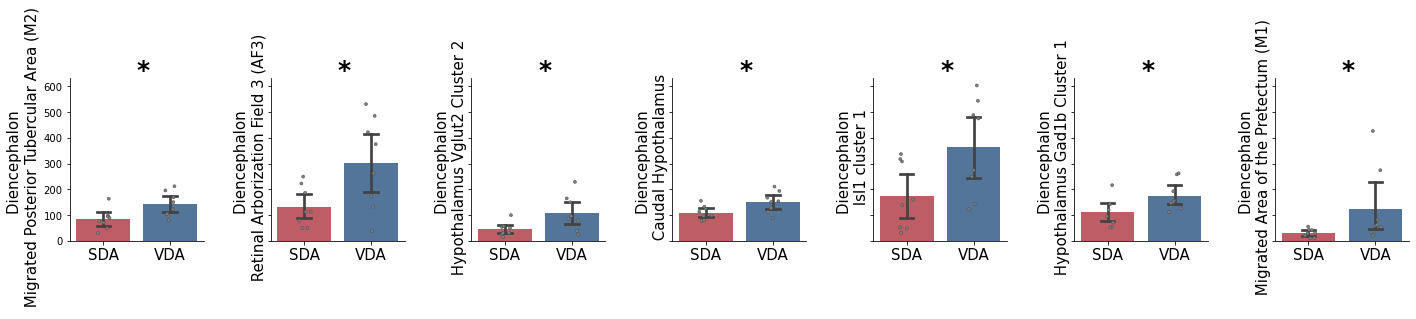

In [153]:
f,ax = plt.subplots(1,7, figsize = (24,3), sharey=True)
plt.subplots_adjust(wspace=0.5, hspace=0)
color = {'SDA':'#cd4d57', 'VDA':'#4974a5'}
fontsize = 5
for i, mask in enumerate (df_summary.loc[df_summary['Unnamed: 7']=='VDA hyper'].index):
    res = '**' if df_summary.loc[df_summary['Unnamed: 7']=='VDA hyper'].iloc[i,-2]<0.01 else '*'
    df_plot = df_normalized_std.loc[mask].reset_index()
    df_plot['cat'] = df_plot['index'].str[-3:]
    sns.barplot(x = "cat",y = mask, data = df_plot, palette=color,ax=ax[i], capsize=0.2)
    sns.stripplot(x="cat", y= mask, data=df_plot, jitter=True,dodge=True, marker='o', color='gray', 
              edgecolor='gray',ax=ax[i], size=3,linewidth=0.5)
    ax[i].set_xticklabels(labels= ['SDA', 'VDA'], fontsize=fontsize+10)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    #ax[i].set_title(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+5)
    ax[i].text(0.5, 1, res, transform=ax[i].transAxes, 
                       size=fontsize+20, color = "black",weight='bold')
    ax[i].set_ylabel(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+10)
    ax[i].set_xlabel("")

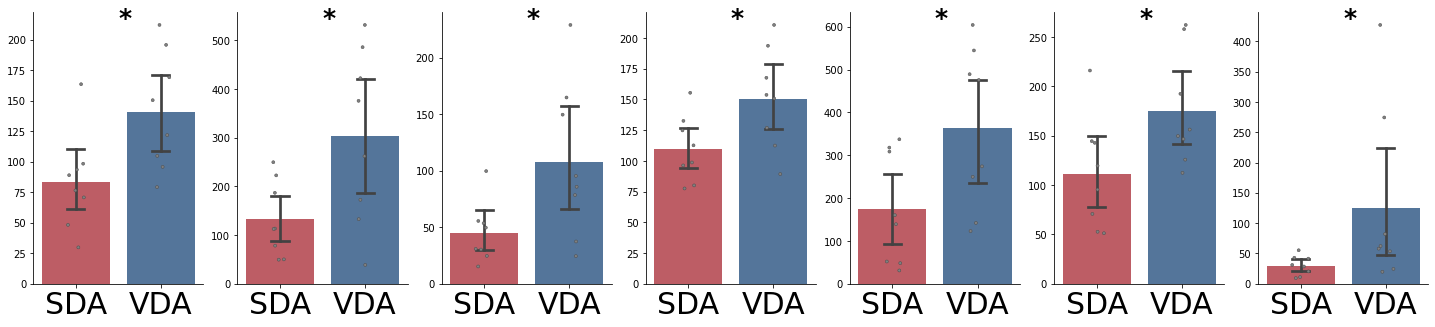

In [23]:
f,ax = plt.subplots(1,7, figsize = (25,5), sharey=False)
plt.subplots_adjust(wspace=0.2, hspace=0)
color = {'SDA':'#cd4d57', 'VDA':'#4974a5'}
fontsize = 5
for i, mask in enumerate (df_summary.loc[df_summary['Unnamed: 7']=='VDA hyper'].index):
    res = '**' if df_summary.loc[df_summary['Unnamed: 7']=='VDA hyper'].iloc[i,-2]<0.01 else '*'
    df_plot = df_normalized_std.loc[mask].reset_index()
    df_plot['cat'] = df_plot['index'].str[-3:]
    sns.barplot(x = "cat",y = mask, data = df_plot, palette=color,ax=ax[i], capsize=0.2)
    sns.stripplot(x="cat", y= mask, data=df_plot, jitter=True,dodge=True, marker='o', color='gray', 
              edgecolor='gray',ax=ax[i], size=3,linewidth=0.5)
    ax[i].set_xticklabels(labels= ['SDA', 'VDA'], fontsize=fontsize+25)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    #ax[i].set_title(mask.split('-')[0]+'\n'+mask.split('-')[1], size=fontsize+5)
    ax[i].text(0.5, 0.95, res, transform=ax[i].transAxes, 
                       size=fontsize+20, color = "black",weight='bold')
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

In [ ]:
df = pd.read_excel('masks_with_sig_dff.xlsx')
from venn import venn
set1= set(df.loc[df['std_comparison_sig']=='y'].index)
set2 = set(df.loc[df['mean_comparison_sig']=='y'].index)
set3 = set(df.loc[df['std_res']=='SDA hyper'].index)
set4 = set(df.loc[df['std_res']=='VDA hyper'].index)
set5 = set(df.loc[df['mean_res']=='SDA hyper'].index)
set6 = set(df.loc[df['mean_res']=='VDA hyper'].index)
sets1 = {
    'masks with std difference':set1,
    'masks with mean difference':set2,

}
fig, ax = plt.subplots(1,3, figsize=(15,5))
plt.subplots_adjust(wspace=0)
venn(sets1, ax=ax[0], legend_loc = 'lower center')
def my_fmt1(x):
    return round(x*len(set1)*0.01)

def my_fmt2(x):
    return round(x*len(set2)*0.01)

ax[1].pie([len(set2), len(set3)], 
          labels = ['higher in SDA','higher in VDA'], 
          autopct=my_fmt1,
         textprops={'size': 15}, colors=['r', 'b'])

ax[2].pie([len(set5), len(set6)], 
          labels = ['higher in SDA','higher in VDA'], 
          autopct=my_fmt2,
         textprops={'size': 15},counterclock=False, colors=['r', 'b'])

plt.show()

In [ ]:

df_roi_num_list = []
for mask in df.index:
    roi_num_list = []
    for fish in dic_0427.keys():
        roi_num = dic_0427[fish].mask.loc[mask].sum()
        roi_num_list.append(roi_num)
    df_roi_num = pd.DataFrame({'Fish':list(dic_0427.keys()), mask:roi_num_list})  
    df_roi_num = df_roi_num.set_index('Fish')
    df_roi_num_list.append(df_roi_num)
df_all_mask_roi_num = pd.concat(df_roi_num_list,axis=1).drop('Fish11')
df_all_mask_roi_num

In [ ]:
df_roi_num_list = []
for mask in df.index:
    roi_num_list = []
    for fish in dic_0208.keys():
        roi_num = dic_0208[fish].mask.loc[mask].sum()
        roi_num_list.append(roi_num)
    df_roi_num = pd.DataFrame({'Fish':list(dic_0208.keys()), mask:roi_num_list})  
    df_roi_num = df_roi_num.set_index('Fish')
    df_roi_num_list.append(df_roi_num)
df_all_mask_roi_num = pd.concat(df_roi_num_list,axis=1).drop('Fish07')
df_all_mask_roi_num


### Brain-wide correlation analysis

In [ ]:
df_nucorr = dic_0427['Fish06'].dff.transpose().corr()

In [ ]:
df_nucorr 

In [ ]:
testlist = [1,2,3]
with open('testlist.pkl', 'wb') as pickle_file:
    pickle.dump(testlist, pickle_file)

In [ ]:
dic_0427['Fish01'].dff

In [ ]:
sns.heatmap(df_nucorr.iloc[:100, :100], vmin=-1,cmap='viridis')

In [ ]:
df_plot = df_nucorr.dropna(how = 'all', axis=0).dropna(how = 'all', axis=1)
sns.heatmap(df_plot, vmin=-1,cmap='viridis')